In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', None)

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('datasets/bestsellers with categories.csv')

First, correct misspelled authors' names.

In [3]:
mask = df['Author'] == "J. K. Rowling"
df.loc[mask, 'Author'] = "J.K. Rowling"

mask = df['Author'] == "George R. R. Martin"
df.loc[mask, 'Author'] = "George R.R. Martin"

Secondly, sort data by user rating and reviews then, drop duplicate records by book names.

In [4]:
df.sort_values(by=['User Rating', 'Reviews'], ascending=False, inplace=True)

In [5]:
df.drop_duplicates(subset=['Name'], keep="first", inplace=True)

Let's see the statistic of book prices.

In [6]:
df['Price'].describe().to_frame()

,Price
count,351.000000
mean,13.054131
std,10.035077
min,0.000000
25%,8.000000
50%,12.000000
75%,16.000000
max,105.000000


From the table above, there are books whose prices are zero, it does not make any sense. Therefore, the books should be filtered out from training phrase.

In [7]:
df = df[df['Price'] > 0]

Let's prepare data for making user rating prediction model. First, features for transforming them to a trainable format.

In [8]:
features = df.loc[:,['Author', 'Reviews', 'Price', 'Year', 'Genre']]
ratings = df['User Rating']

In [9]:
features['Author'] = features['Author'].astype('category').cat.codes
features['Genre'] = features['Genre'].astype('category').cat.codes

The features have to be rescaled to a normal distribution and split them into training and test sets respectively.

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, ratings.values, test_size=0.1, random_state=14)

Fit a linear regression model and make predictions on a test set

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

In [14]:
test_df = pd.DataFrame(data={"prediction": y_pred, "price": y_test})

Plot line chart to see the gaps between prices and predicted prices

<AxesSubplot:>

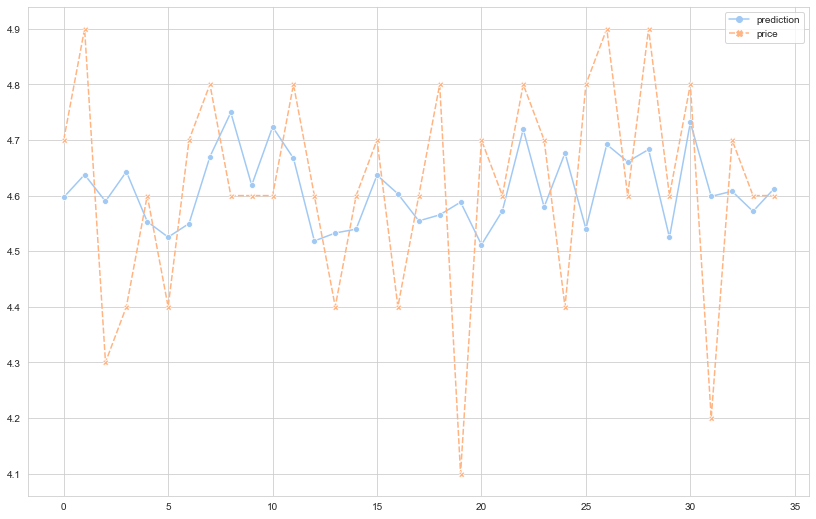

In [15]:
sns.set_palette('pastel')
fig, ax = plt.subplots(figsize=(14, 9))

sns.lineplot(
    ax=ax,
    data=test_df,
    markers=True, dashes=True
)


In [18]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

f"Root mean square error: {round(rmse, 3)}"

'Root mean square error: 0.183'